In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Causal Rivers

In [2]:
path = '../workflow/results/causalrivers_run1/summary/results.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,id,dataset,resolution,scenario,seed,subsample,repeat,AUROC,F1,Recall,Precision,runtime,lag,sum,lambda_a,lambda_w,w_thres,alpha
0,dummy,causalrivers,1D,close_3,0,1,1,0.777778,0.666667,0.666667,0.666667,0.000164,NaN,NaN,NaN,NaN,NaN,NaN
1,dummy,causalrivers,1D,close_3,1,1,1,1.000000,1.000000,1.000000,1.000000,0.000159,NaN,NaN,NaN,NaN,NaN,NaN
2,dummy,causalrivers,1D,close_3,2,1,1,0.777778,0.666667,0.666667,0.666667,0.000167,NaN,NaN,NaN,NaN,NaN,NaN
3,dummy,causalrivers,1D,close_3,3,1,1,1.000000,1.000000,1.000000,1.000000,0.000147,NaN,NaN,NaN,NaN,NaN,NaN
4,dummy,causalrivers,1D,close_3,4,1,1,0.950000,0.800000,1.000000,0.666667,0.000212,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def res2hour(x):
    if x['resolution'].endswith('h'):
        return float(x['resolution'].split('h')[0])
    elif x['resolution'].endswith('D'):
        return float(x['resolution'][0]) * 24.0
    else:
        return float(x['resolution'][:2])/60.0

In [5]:
df['resolution_float'] = df.apply(res2hour, axis=1)

### AUROC

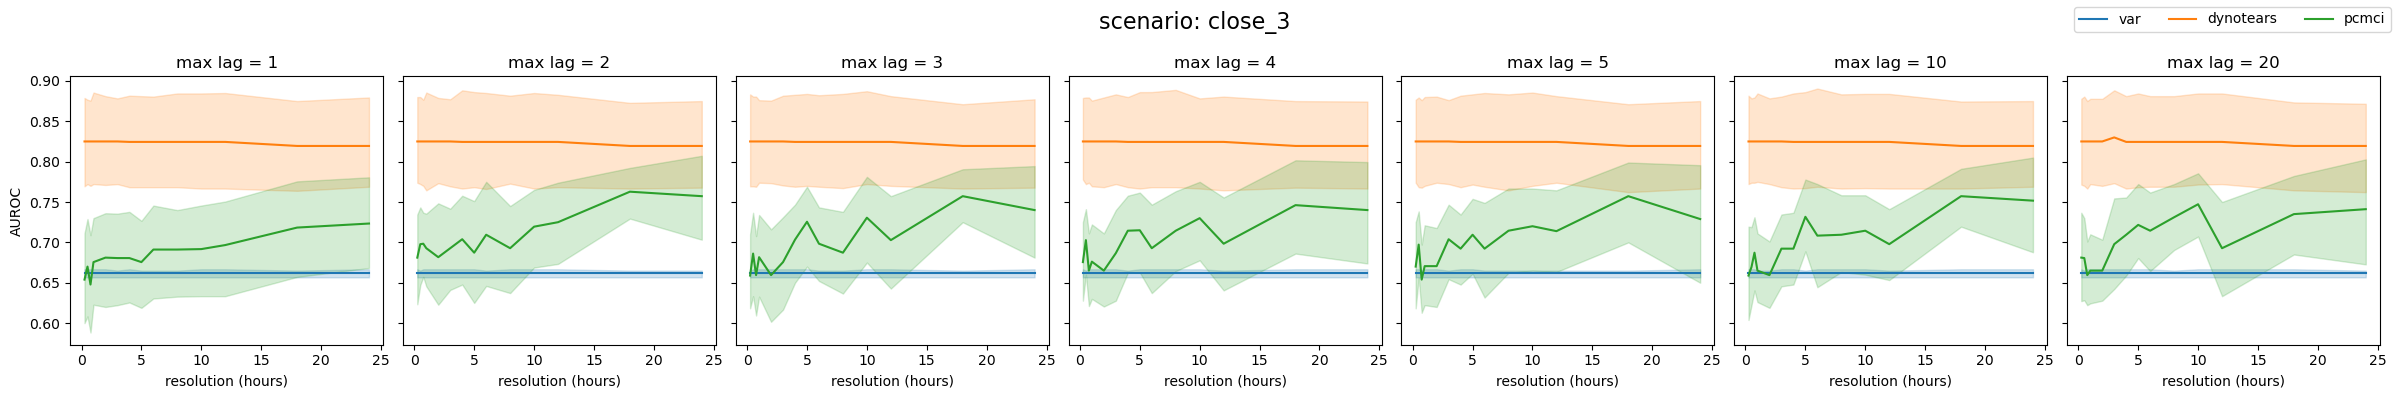

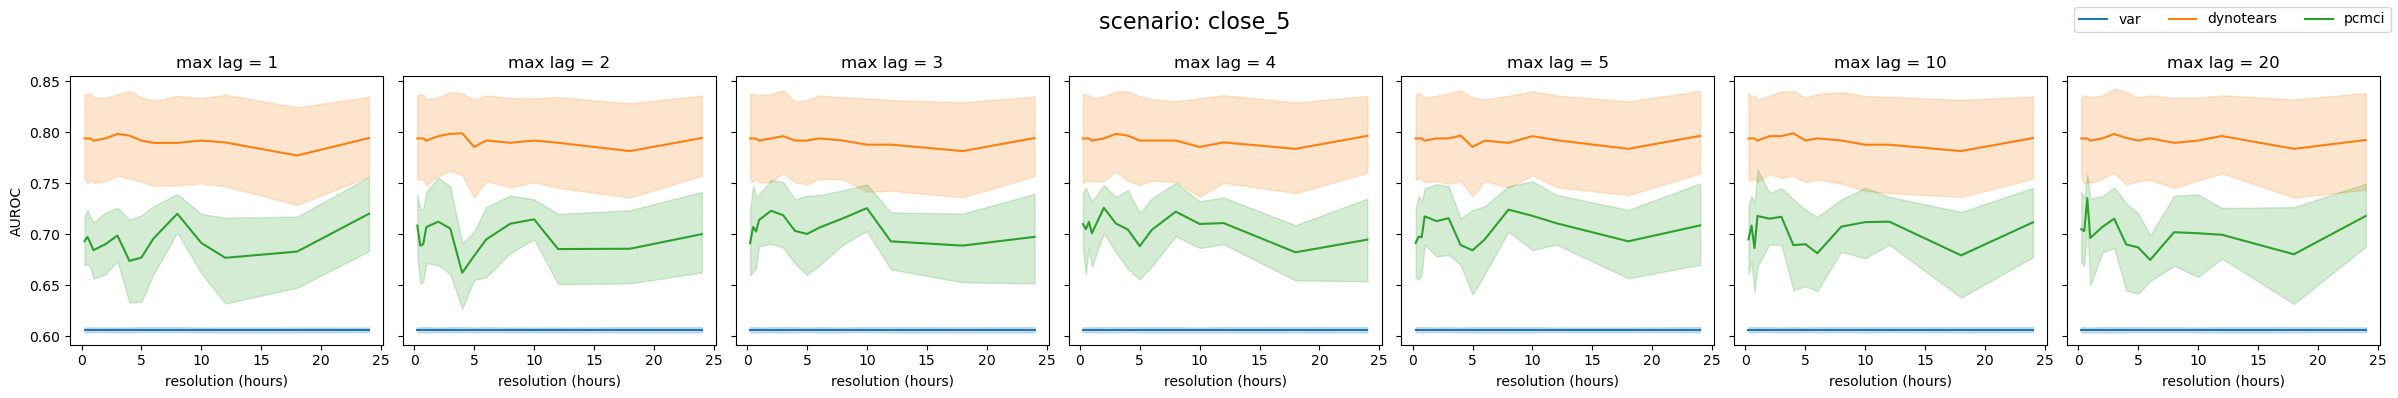

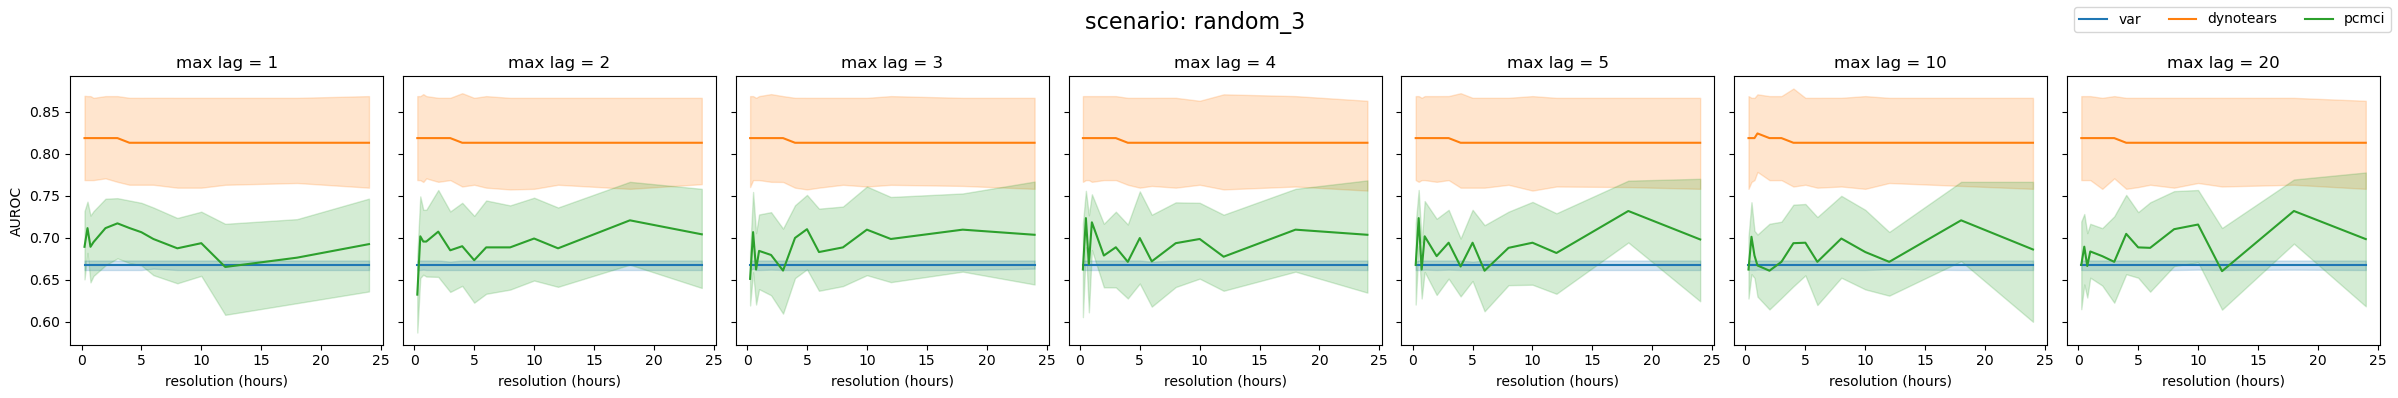

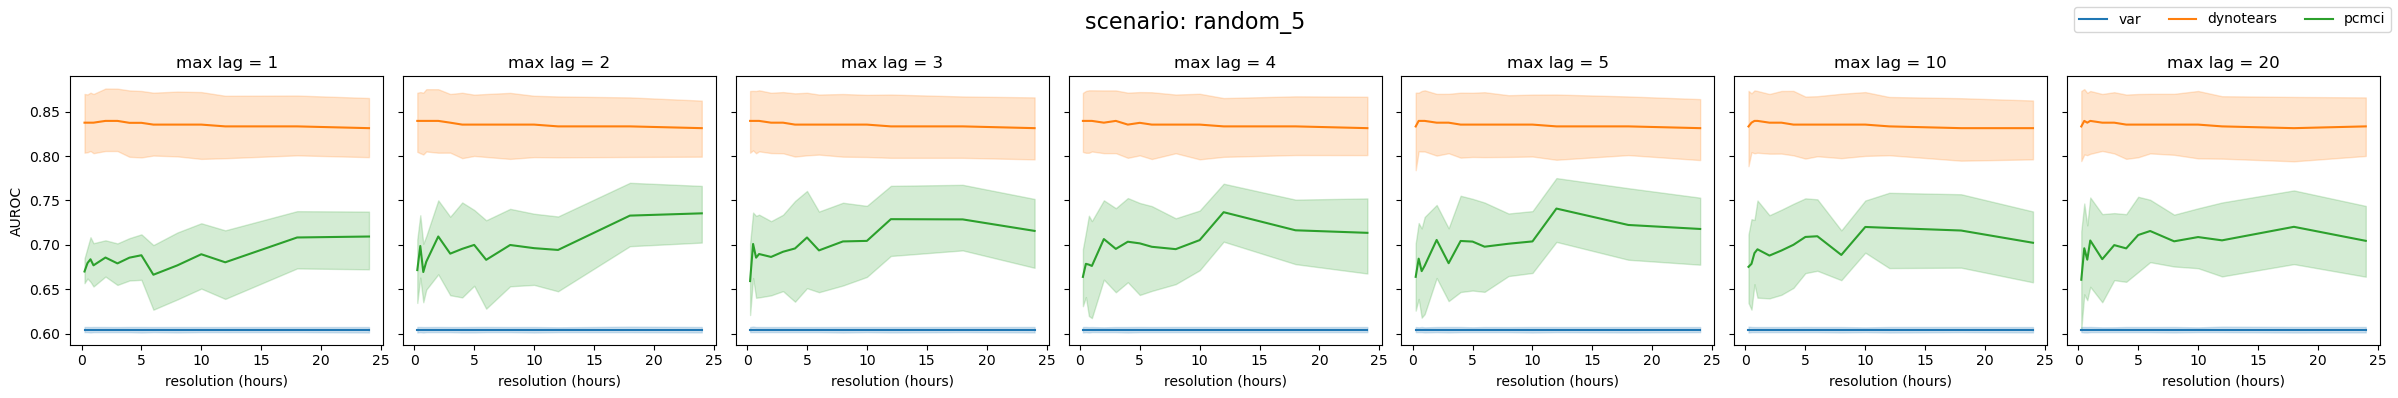

In [48]:
metric = 'AUROC'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]
scenarios = ['close_3', 'close_5', 'random_3', 'random_5']

for s in scenarios:
    fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

    for l, ax in zip(lags, axs):
        df_local = df[(df['lag'] == l) & (df['scenario'] == s)]
        plot_legend = last_lag == l
        sns.lineplot(df_local, x='resolution_float', y=metric, hue='id', ax=ax, legend=plot_legend)
        ax.set_xlabel('resolution (hours)')
        ax.set_title(f"max lag = {int(l)}")
        if plot_legend:
            ax.get_legend().remove()

    fig.legend(ncol=3)
    fig.suptitle(f"scenario: {s}", fontsize=16)
    plt.tight_layout()


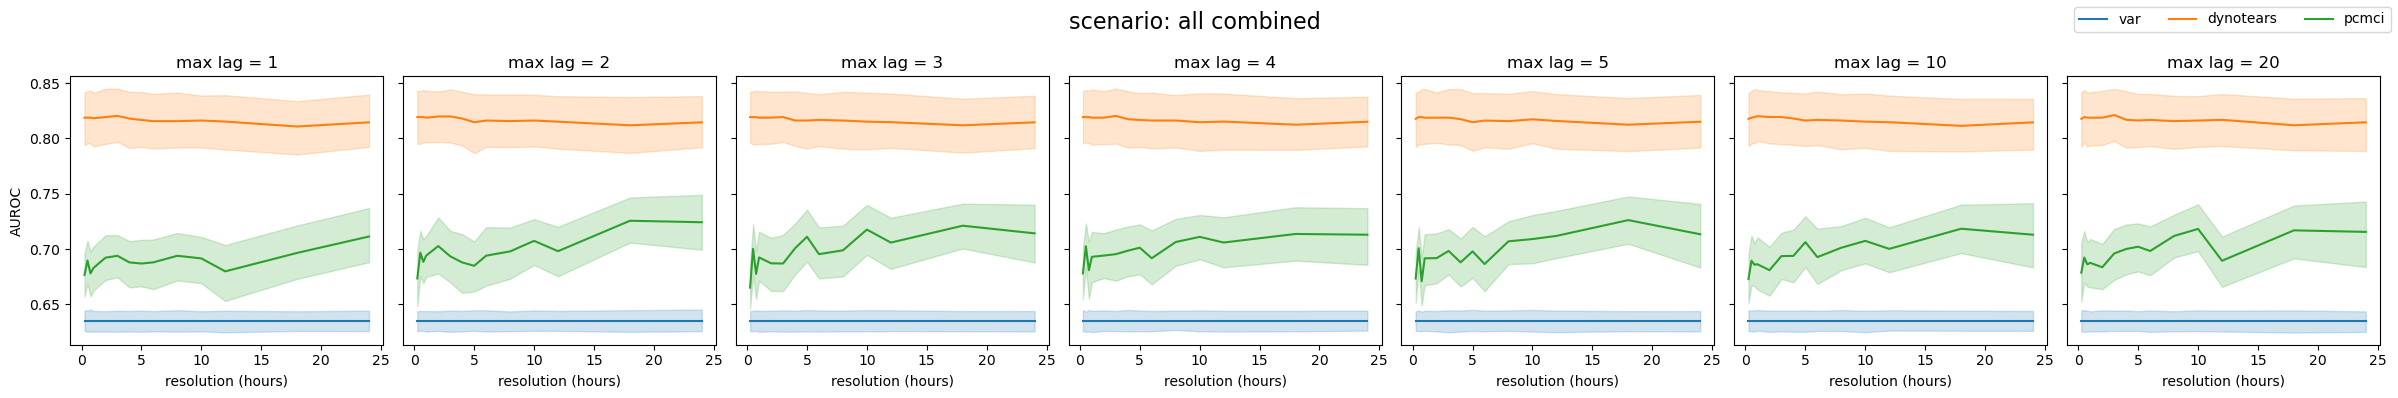

In [50]:
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]

fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

for l, ax in zip(lags, axs):
    df_local = df[(df['lag'] == l)]
    plot_legend = last_lag == l
    sns.lineplot(df_local, x='resolution_float', y='AUROC', hue='id', ax=ax, legend=plot_legend)
    ax.set_xlabel('resolution (hours)')
    ax.set_title(f"max lag = {int(l)}")
    if plot_legend:
        ax.get_legend().remove()

fig.legend(ncol=3)
fig.suptitle(f"scenario: all combined", fontsize=16)
plt.tight_layout()


### F1

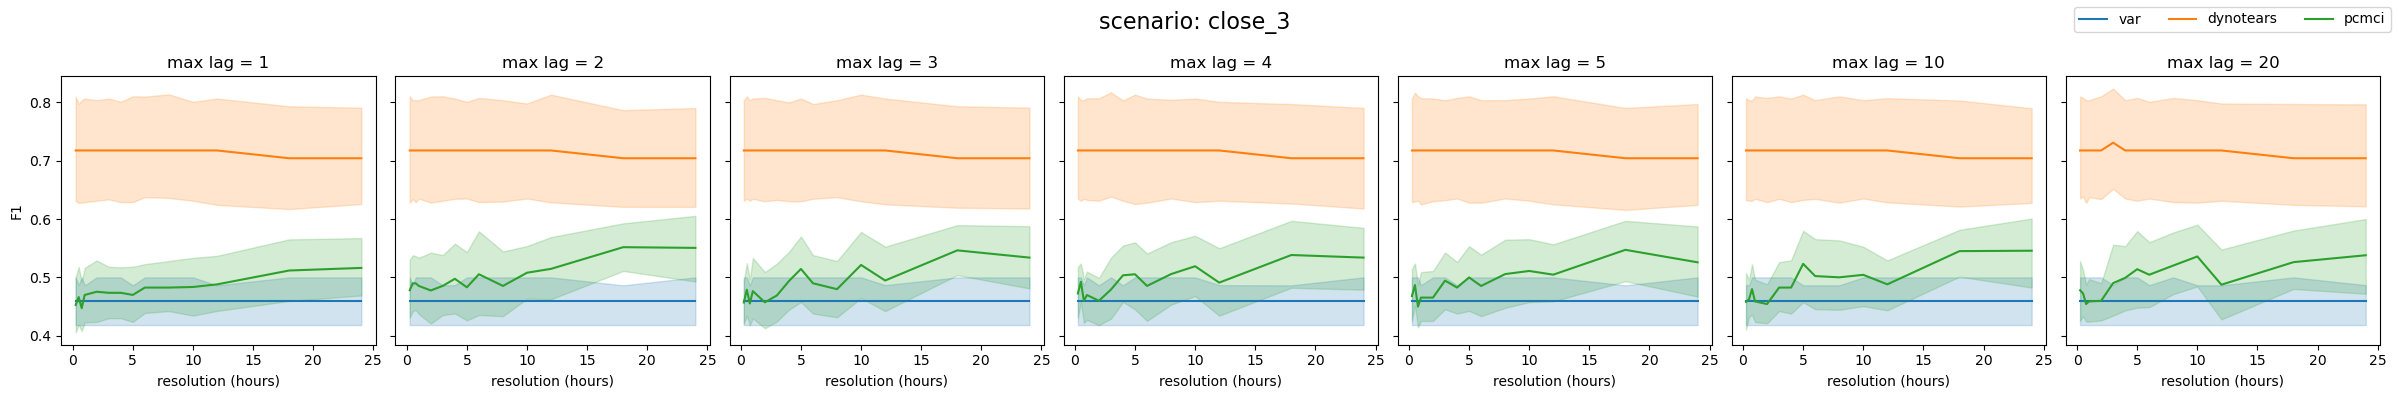

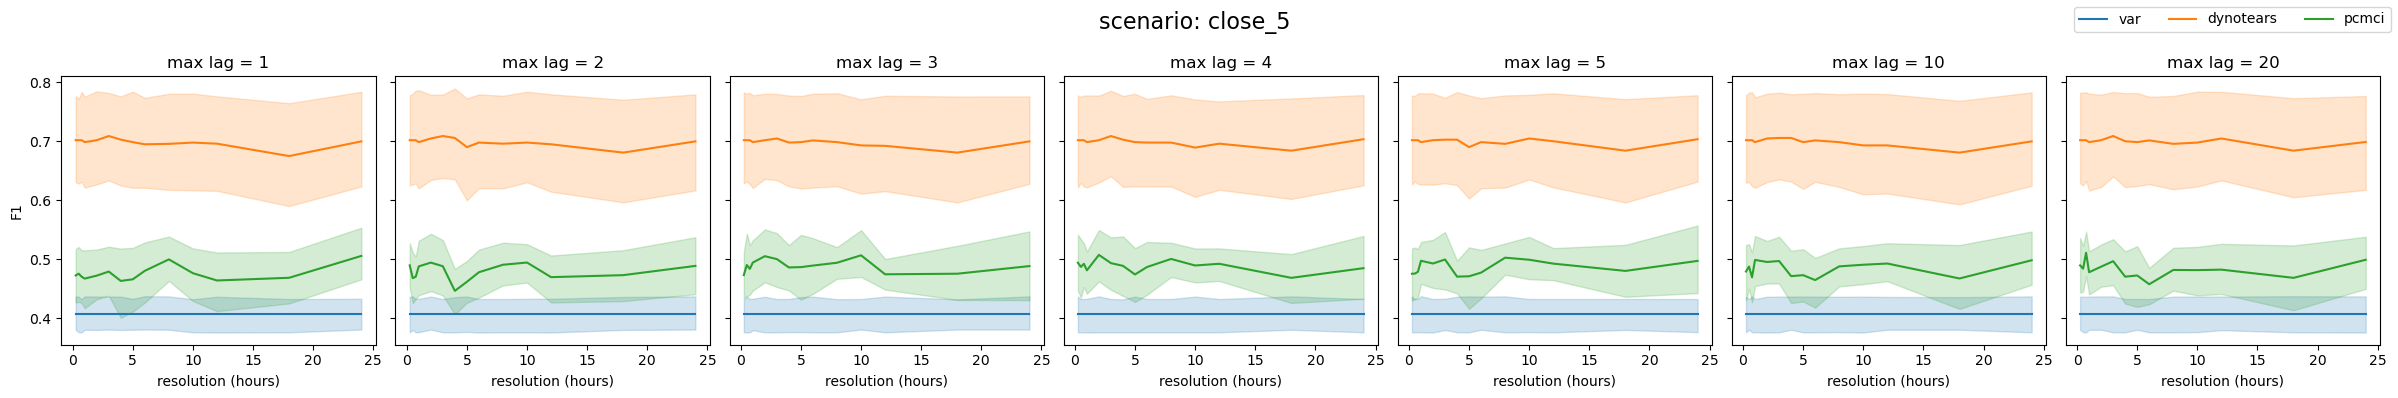

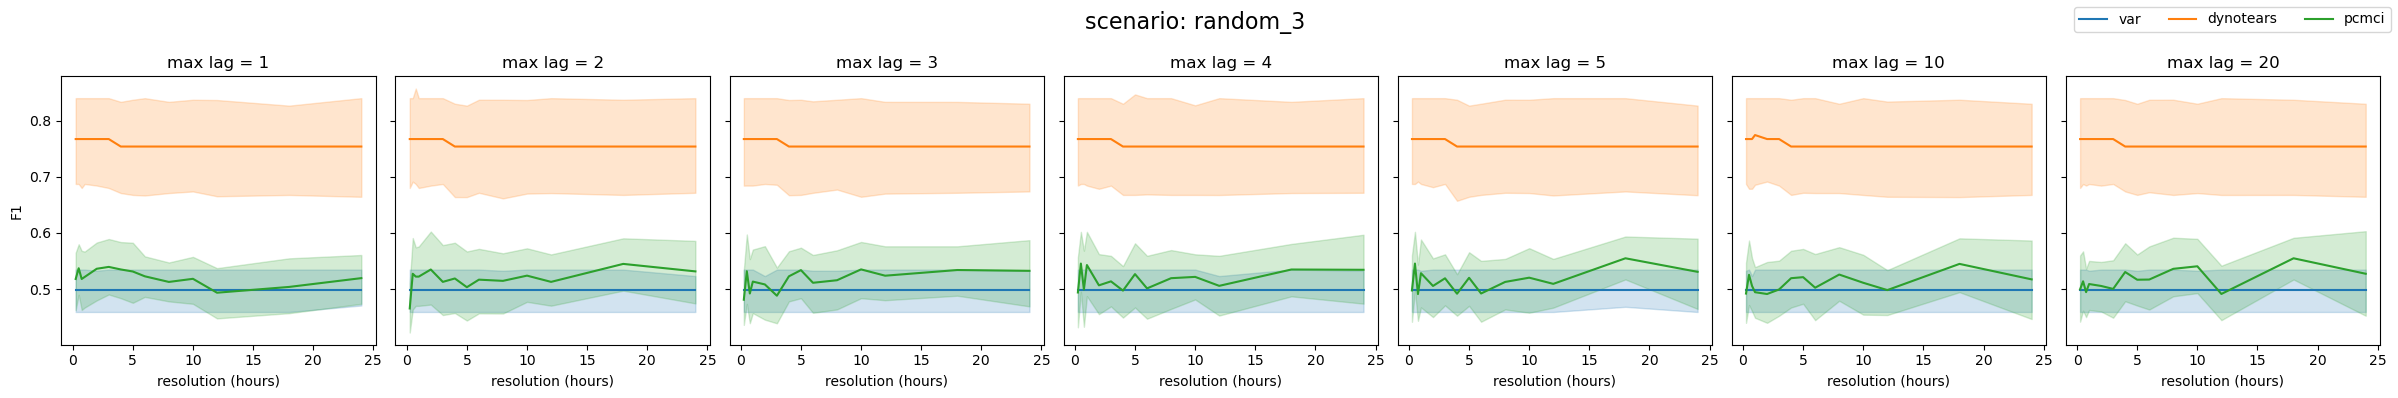

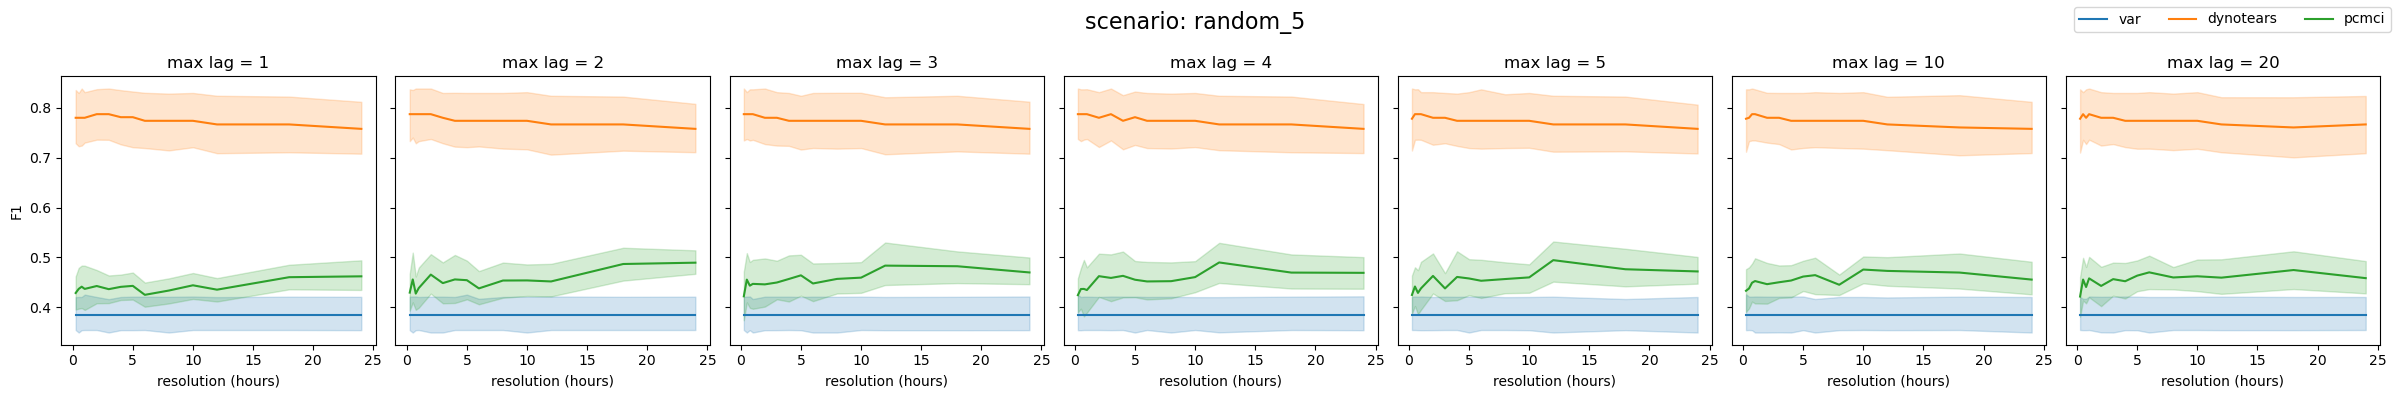

In [6]:
metric = 'F1'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]
scenarios = ['close_3', 'close_5', 'random_3', 'random_5']

for s in scenarios:
    fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

    for l, ax in zip(lags, axs):
        df_local = df[(df['lag'] == l) & (df['scenario'] == s)]
        plot_legend = last_lag == l
        sns.lineplot(df_local, x='resolution_float', y=metric, hue='id', ax=ax, legend=plot_legend)
        ax.set_xlabel('resolution (hours)')
        ax.set_title(f"max lag = {int(l)}")
        if plot_legend:
            ax.get_legend().remove()

    fig.legend(ncol=3)
    fig.suptitle(f"scenario: {s}", fontsize=16)
    plt.tight_layout()


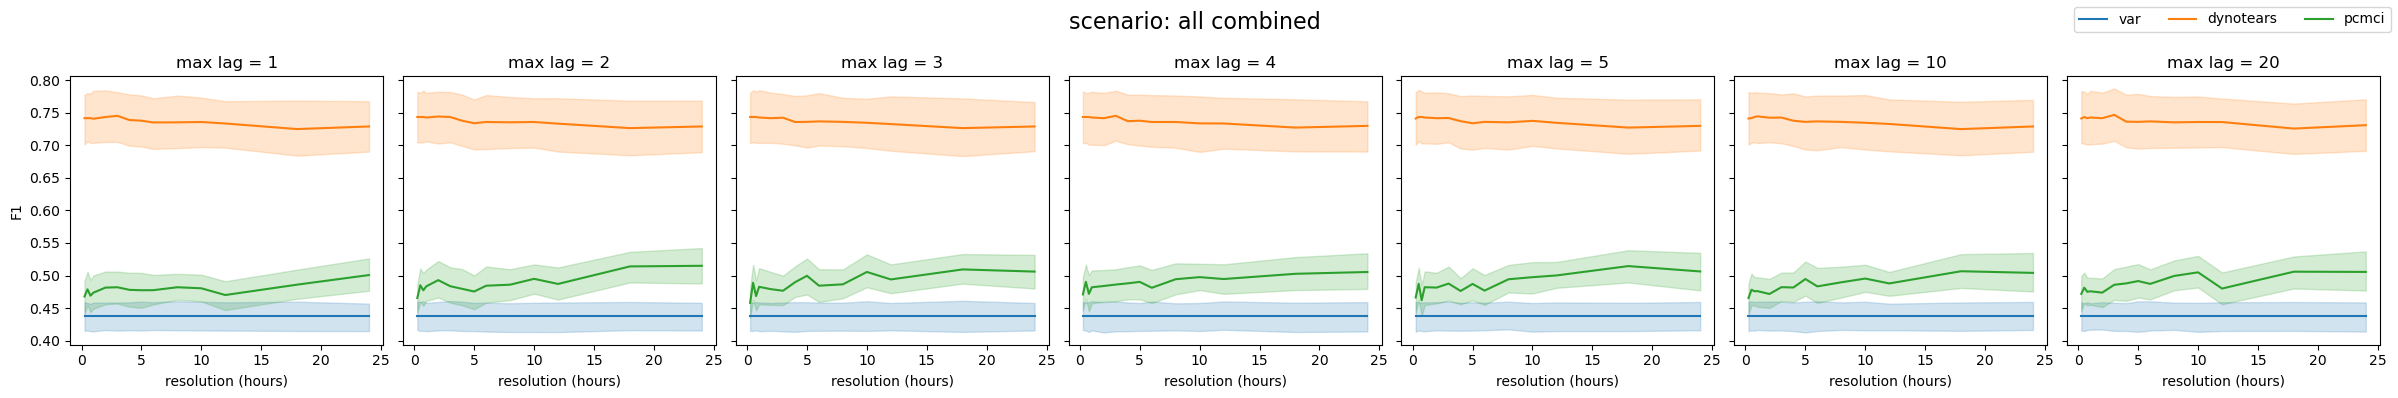

In [7]:
metric = 'F1'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]

fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

for l, ax in zip(lags, axs):
    df_local = df[(df['lag'] == l)]
    plot_legend = last_lag == l
    sns.lineplot(df_local, x='resolution_float', y=metric, hue='id', ax=ax, legend=plot_legend)
    ax.set_xlabel('resolution (hours)')
    ax.set_title(f"max lag = {int(l)}")
    if plot_legend:
        ax.get_legend().remove()

fig.legend(ncol=3)
fig.suptitle(f"scenario: all combined", fontsize=16)
plt.tight_layout()


### Recall

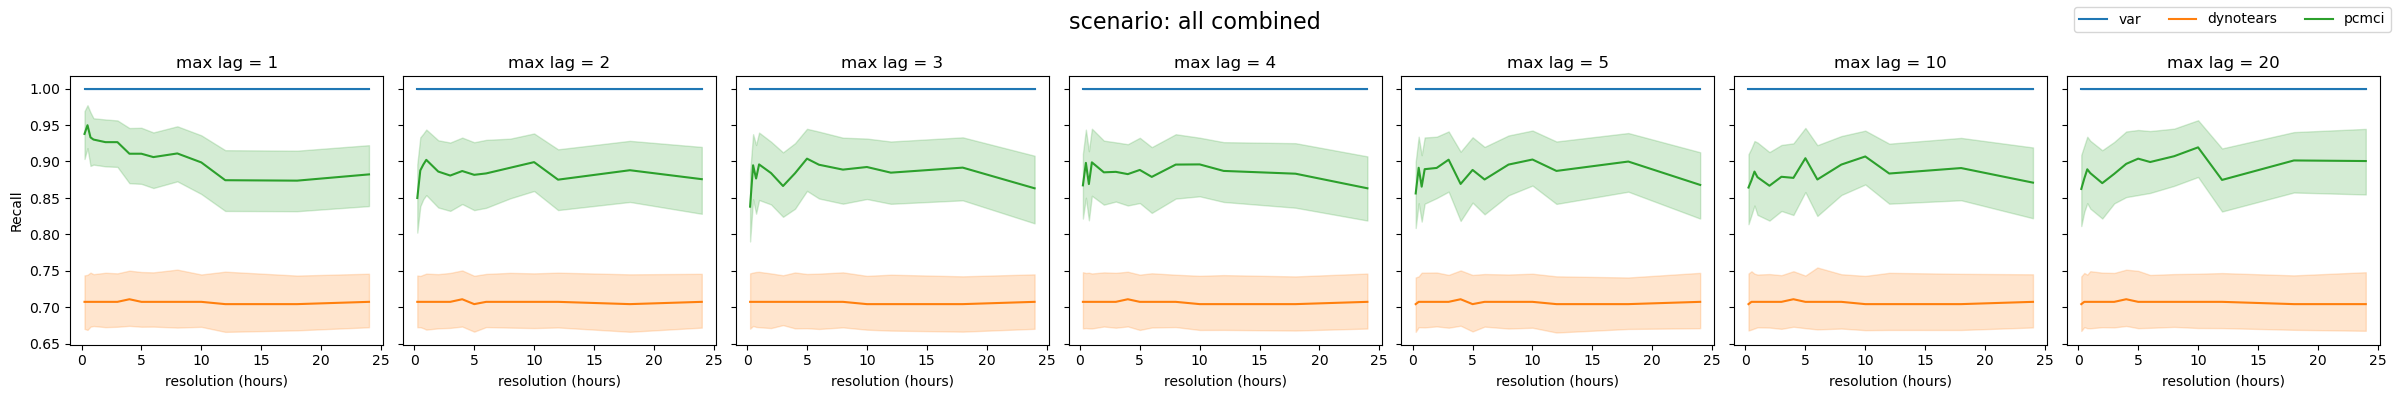

In [8]:
metric = 'Recall'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]

fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

for l, ax in zip(lags, axs):
    df_local = df[(df['lag'] == l)]
    plot_legend = last_lag == l
    sns.lineplot(df_local, x='resolution_float', y=metric, hue='id', ax=ax, legend=plot_legend)
    ax.set_xlabel('resolution (hours)')
    ax.set_title(f"max lag = {int(l)}")
    if plot_legend:
        ax.get_legend().remove()

fig.legend(ncol=3)
fig.suptitle(f"scenario: all combined", fontsize=16)
plt.tight_layout()


### Precision

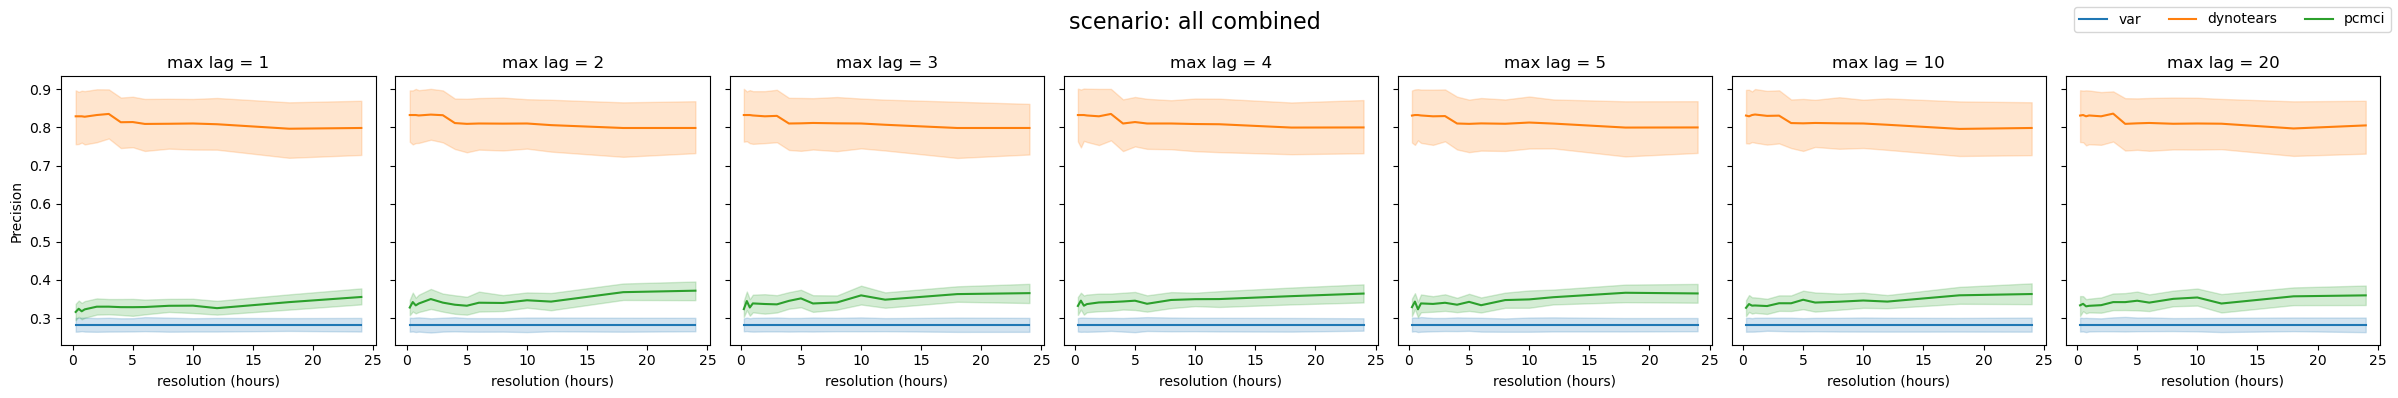

In [9]:
metric = 'Precision'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]

fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

for l, ax in zip(lags, axs):
    df_local = df[(df['lag'] == l)]
    plot_legend = last_lag == l
    sns.lineplot(df_local, x='resolution_float', y=metric, hue='id', ax=ax, legend=plot_legend)
    ax.set_xlabel('resolution (hours)')
    ax.set_title(f"max lag = {int(l)}")
    if plot_legend:
        ax.get_legend().remove()

fig.legend(ncol=3)
fig.suptitle(f"scenario: all combined", fontsize=16)
plt.tight_layout()


In [7]:
df_avg = df[df['lag'] > 0]
df_auroc = df_avg.groupby(['id', 'resolution_float', 'lag'], as_index=False)['AUROC'].mean()
df_f1 = df_avg.groupby(['id', 'resolution_float', 'lag'], as_index=False)['F1'].mean()

In [36]:
df_auroc

,id,resolution_float,lag,AUROC
0,dynotears,0.25,1.0,0.825000
1,dynotears,0.25,2.0,0.825000
2,dynotears,0.25,3.0,0.825000
3,dynotears,0.25,4.0,0.825000
4,dynotears,0.25,5.0,0.825000
...,...,...,...,...
130,var,6.00,1.0,0.661667
131,var,6.00,2.0,0.661667
132,var,6.00,3.0,0.661667
133,var,6.00,4.0,0.661667


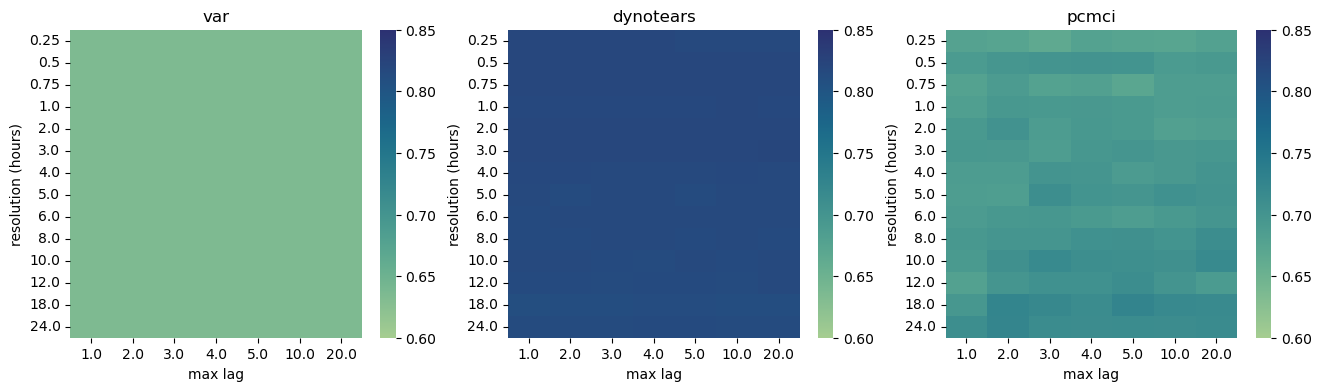

In [15]:
algs = ['var', 'dynotears', 'pcmci']

fig, axs = plt.subplots(nrows=1, ncols=len(algs), figsize=(16,4))

for ax, alg in zip(axs, algs):
    df_l = df_auroc[df_auroc['id'] == alg]
    df_heat = df_l.pivot(index='resolution_float', columns='lag', values='AUROC')
    sns.heatmap(df_heat, ax=ax, vmin=0.6, vmax=0.85, cmap='crest')
    ax.set_title(alg)
    ax.set_xlabel('max lag')
    ax.set_ylabel('resolution (hours)')

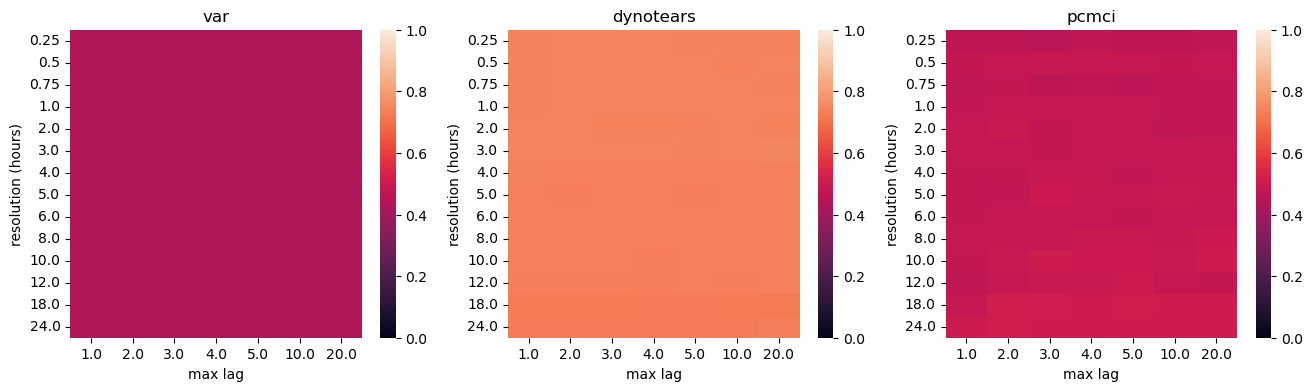

In [12]:
algs = ['var', 'dynotears', 'pcmci']

fig, axs = plt.subplots(nrows=1, ncols=len(algs), figsize=(16,4))

for ax, alg in zip(axs, algs):
    df_l = df_f1[df_f1['id'] == alg]
    df_heat = df_l.pivot(index='resolution_float', columns='lag', values='F1')
    sns.heatmap(df_heat, ax=ax, vmin=0.0, vmax=1.0)
    ax.set_title(alg)
    ax.set_xlabel('max lag')
    ax.set_ylabel('resolution (hours)')

## Synthetic

In [2]:
path = '../workflow/results/synth_run1/summary/results.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,id,dataset,seed,subsample,repeat,AUROC,F1,Recall,Precision,runtime,lag,sum,lambda_a,lambda_w,w_thres,alpha
0,dummy,synth,indep,1,1,1.0,1.0,1.0,1.0,0.000144,NaN,NaN,NaN,NaN,NaN,NaN
1,dummy,synth,indep,2,1,1.0,1.0,1.0,1.0,0.000138,NaN,NaN,NaN,NaN,NaN,NaN
2,dummy,synth,indep,3,1,1.0,1.0,1.0,1.0,0.000152,NaN,NaN,NaN,NaN,NaN,NaN
3,dummy,synth,indep,4,1,1.0,1.0,1.0,1.0,0.000149,NaN,NaN,NaN,NaN,NaN,NaN
4,dummy,synth,indep,5,1,1.0,1.0,1.0,1.0,0.000147,NaN,NaN,NaN,NaN,NaN,NaN


### Recall

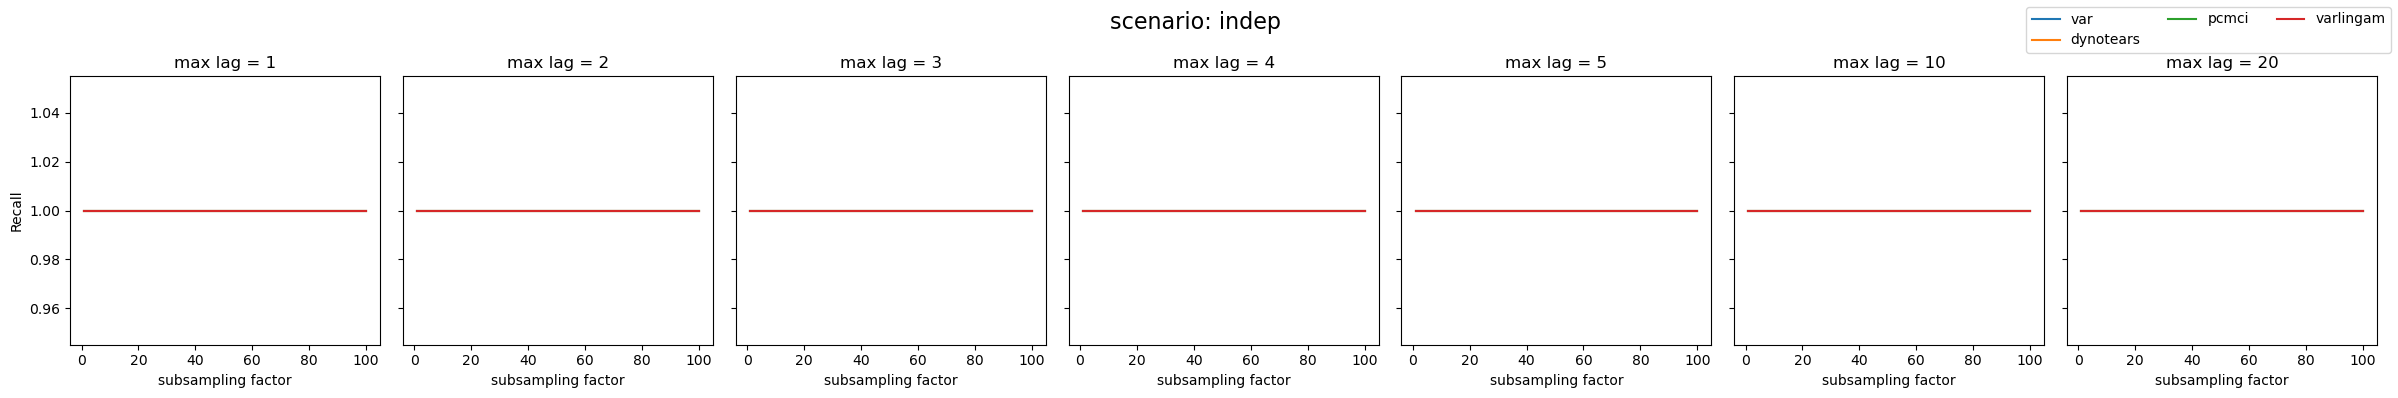

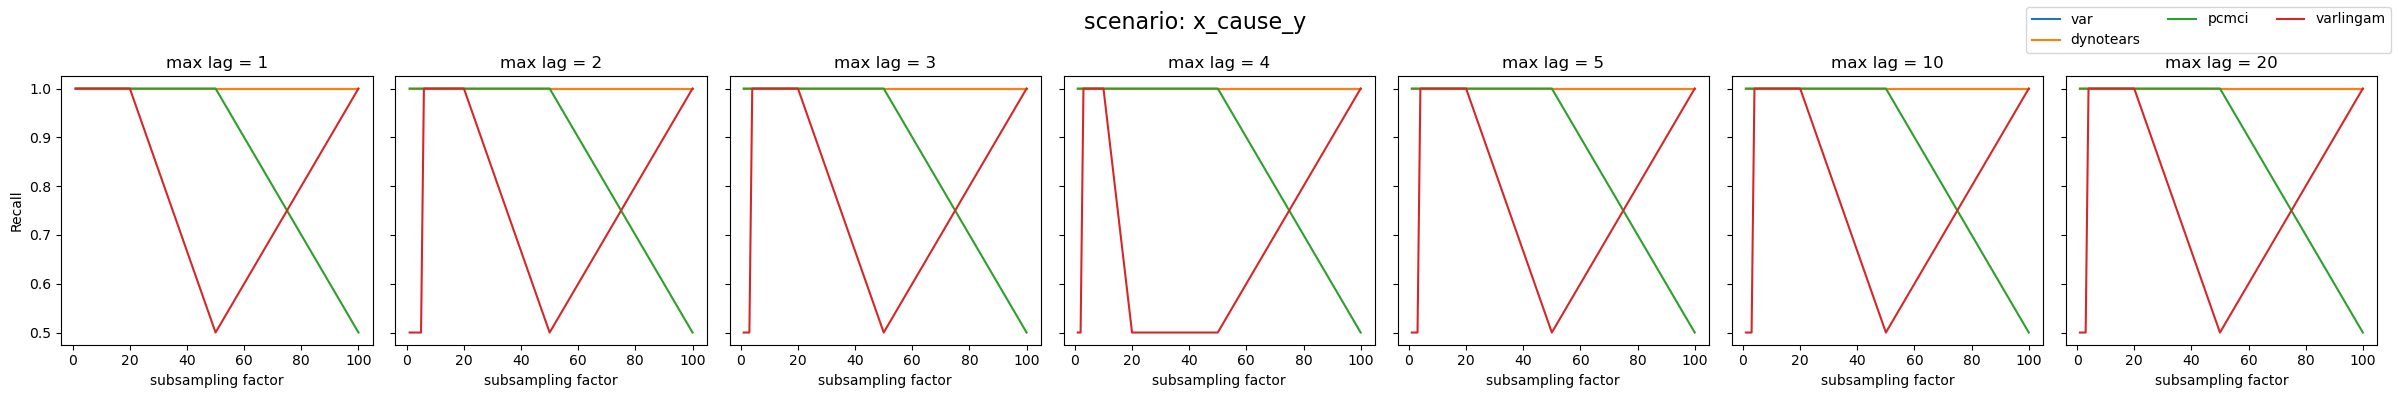

In [4]:
metric = 'Recall'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]
scenarios = ['indep', 'x_cause_y']
for s in scenarios:
    fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

    for l, ax in zip(lags, axs):
        df_local = df[(df['lag'] == l) & (df['seed'] == s)]
        plot_legend = last_lag == l
        sns.lineplot(data=df_local, x='subsample', y=metric, hue='id', ax=ax, legend=plot_legend)
        ax.set_xlabel('subsampling factor')
        ax.set_title(f"max lag = {int(l)}")
        if plot_legend:
            ax.get_legend().remove()

    fig.legend(ncol=3)
    fig.suptitle(f"scenario: {s}", fontsize=16)
    plt.tight_layout()

### Precision

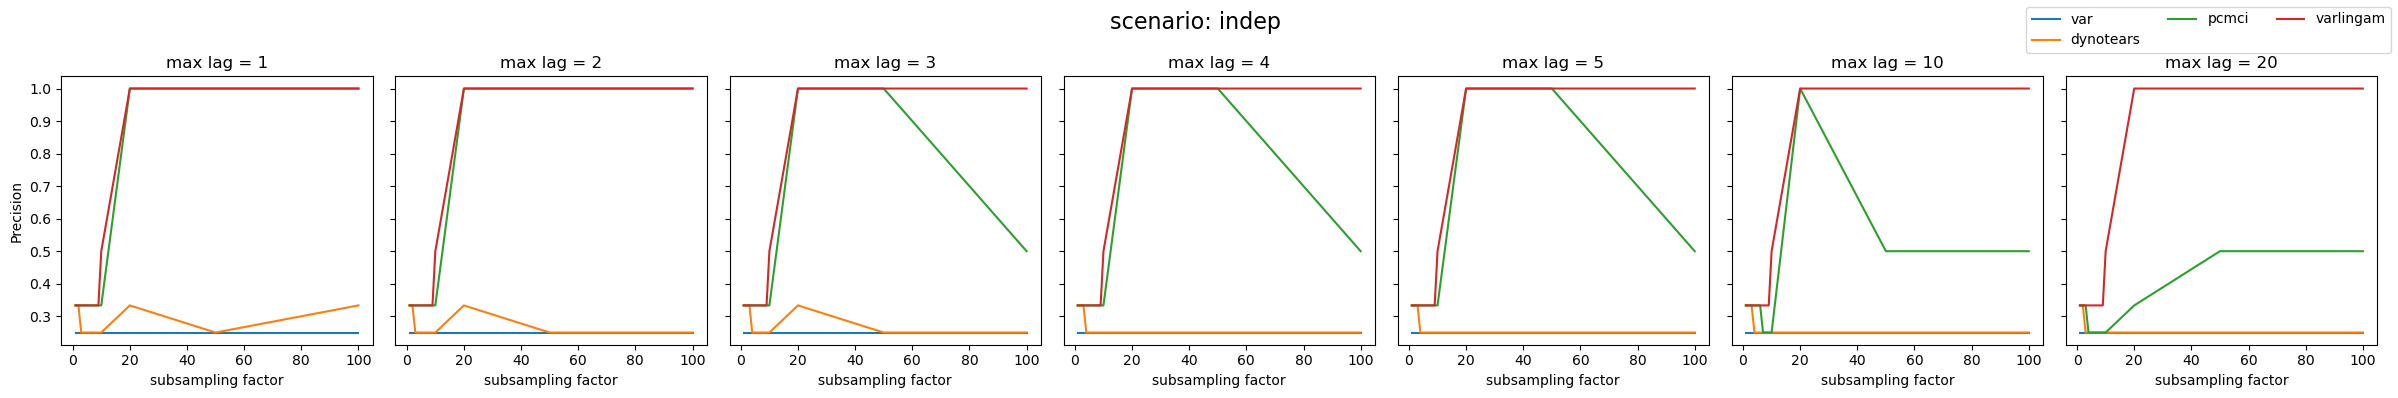

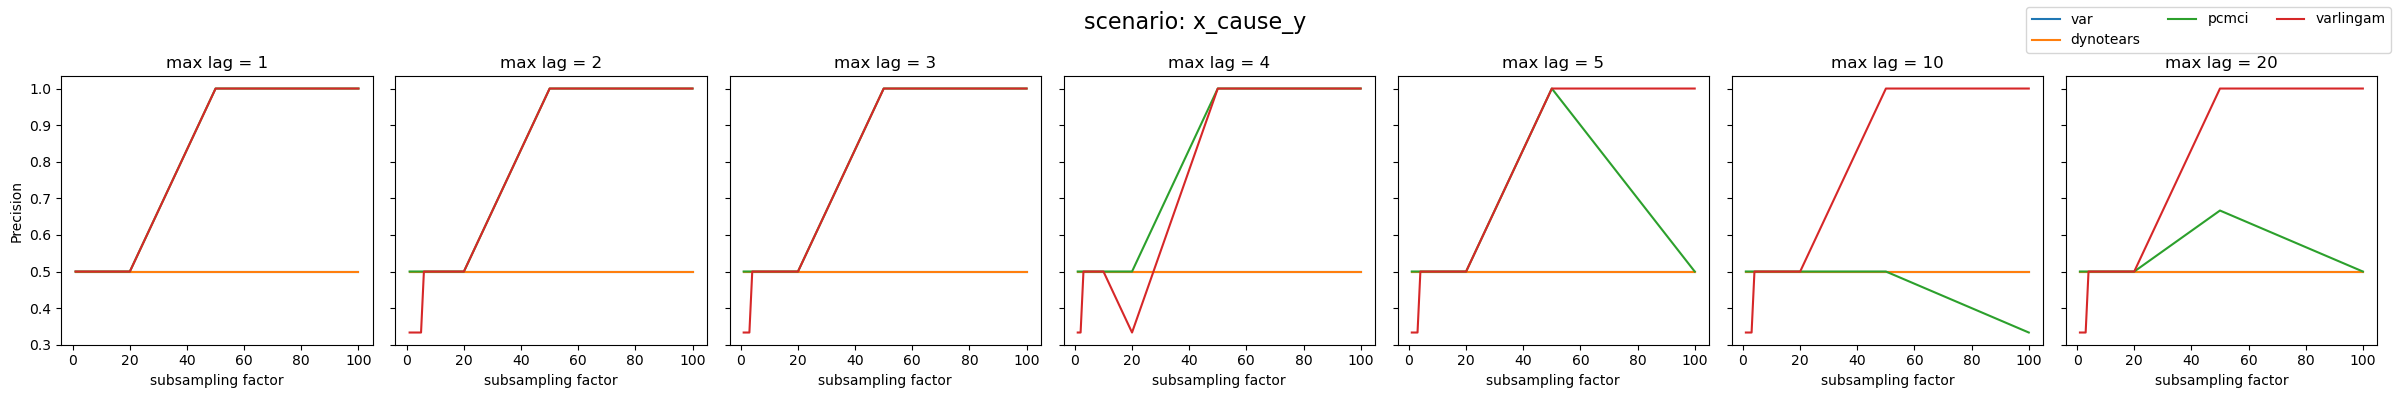

In [5]:
metric = 'Precision'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]
scenarios = ['indep', 'x_cause_y']
for s in scenarios:
    fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

    for l, ax in zip(lags, axs):
        df_local = df[(df['lag'] == l) & (df['seed'] == s)]
        plot_legend = last_lag == l
        sns.lineplot(data=df_local, x='subsample', y=metric, hue='id', ax=ax, legend=plot_legend)
        ax.set_xlabel('subsampling factor')
        ax.set_title(f"max lag = {int(l)}")
        if plot_legend:
            ax.get_legend().remove()

    fig.legend(ncol=3)
    fig.suptitle(f"scenario: {s}", fontsize=16)
    plt.tight_layout()

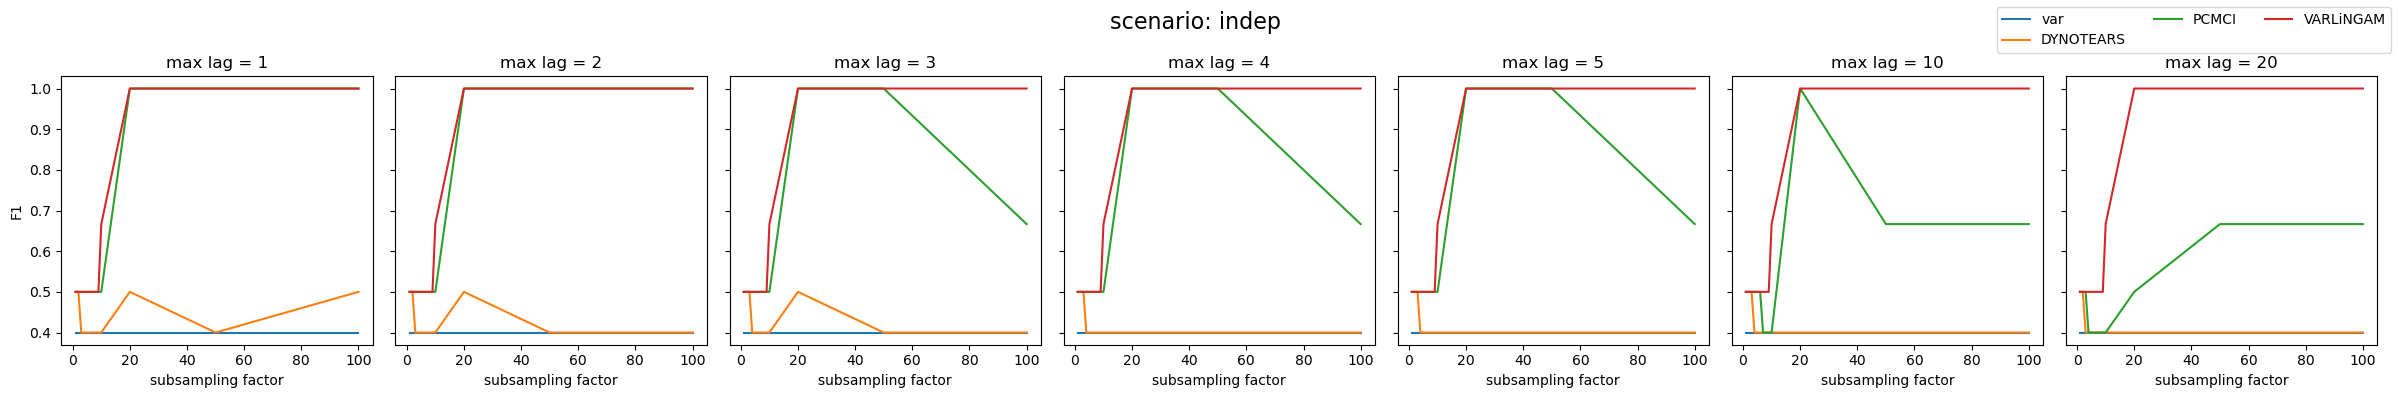

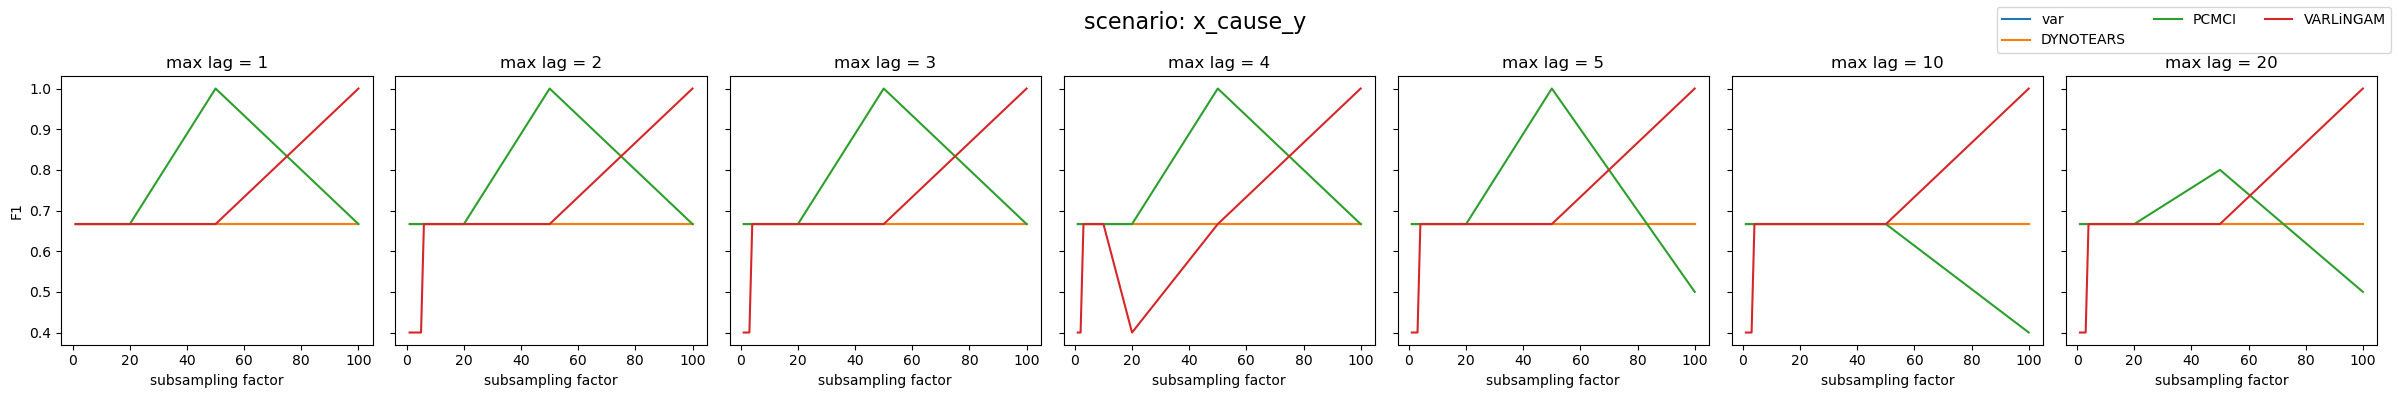

In [68]:
metric = 'F1'
lags = df[~df['lag'].isnull()]['lag'].unique()
n_lags = len(lags)
last_lag = lags[-1]
scenarios = ['indep', 'x_cause_y']
for s in scenarios:
    fig, axs = plt.subplots(nrows=1, ncols=n_lags, figsize=(24, 4), sharey=True)

    for l, ax in zip(lags, axs):
        df_local = df[(df['lag'] == l) & (df['seed'] == s)]
        plot_legend = last_lag == l
        sns.lineplot(data=df_local, x='subsample', y=metric, hue='id', ax=ax, legend=plot_legend)
        ax.set_xlabel('subsampling factor')
        ax.set_title(f"max lag = {int(l)}")
        if plot_legend:
            ax.get_legend().remove()

    fig.legend(ncol=3)
    fig.suptitle(f"scenario: {s}", fontsize=16)
    plt.tight_layout()

In [32]:
df.loc[df['id'] == 'pcmci', 'id'] = 'PCMCI'
df.loc[df['id'] == 'dynotears', 'id'] = 'DYNOTEARS'
df.loc[df['id'] == 'varlingam', 'id'] = 'VARLiNGAM'

In [129]:
def plot_case(df, a, m, cbar=True):
    result = df.pivot(index='subsample', columns='lag', values=m)
    result.sort_index(level=0, ascending=False, inplace=True)
    ax = sns.heatmap(result, cmap=sns.color_palette("vlag", as_cmap=True), vmin=0, square=True, cbar_kws={'label': f'{m}'}, cbar=cbar)
    ax.set(xlabel='Window length, Q, (in lags)', ylabel='Downsampling factor, k', title=f'{a}')

def plot_case_ax(df, ax, a, m, ylabel=True, cbar=True, cbar_ax=None):
    result = df.pivot(index='subsample', columns='lag', values=m)
    result.sort_index(level=0, ascending=False, inplace=True)
    if m == 'F1':
        m_name = 'F1 Score'
    else:
        m_name = m
    if cbar:
        ax_local = sns.heatmap(result, cmap=sns.color_palette("vlag", as_cmap=True), vmin=0, square=True, cbar_kws={'label': f'{m_name}'}, cbar=cbar, ax=ax, cbar_ax=cbar_ax)
    else:
        ax_local = sns.heatmap(result, cmap=sns.color_palette("vlag", as_cmap=True), vmin=0, square=True, cbar=cbar, ax=ax)
    if ylabel:
        ax_local.set(ylabel='Downsampling factor, k')
    else:
        ax_local.set(ylabel="", yticklabels=[])
    ax_local.set(xlabel='Window length, Q', title=f'{a}')

C:\Users\dmach\AppData\Local\Temp\ipykernel_8400\4087822804.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['lag'] = df_result['lag'].astype(int)


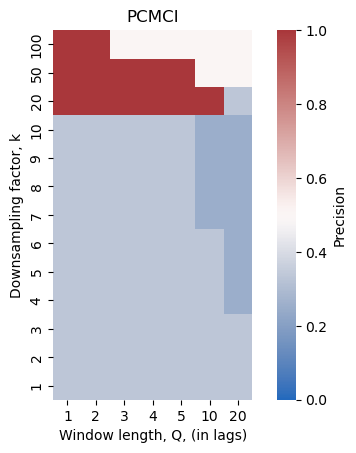

In [77]:
#algs = ['PCMCI', 'DYNOTEARS', 'VARLiNGAM']
algs = ['PCMCI']
#scenarios = ['indep', 'x_cause_y']
scenarios = ['indep']
#metrics = ['Precision', 'Recall']
metrics = ['Precision']

for a in algs:
    for s in scenarios:
        df_result = df[(df['id'] == a) & (df['seed'] == s)]
        df_result['lag'] = df_result['lag'].astype(int)
        for m in metrics:
            plot_case(df_result, a, m)

C:\Users\dmach\AppData\Local\Temp\ipykernel_8400\1388889751.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['lag'] = df_result['lag'].astype(int)
C:\Users\dmach\AppData\Local\Temp\ipykernel_8400\1388889751.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['lag'] = df_result['lag'].astype(int)
C:\Users\dmach\AppData\Local\Temp\ipykernel_8400\1388889751.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

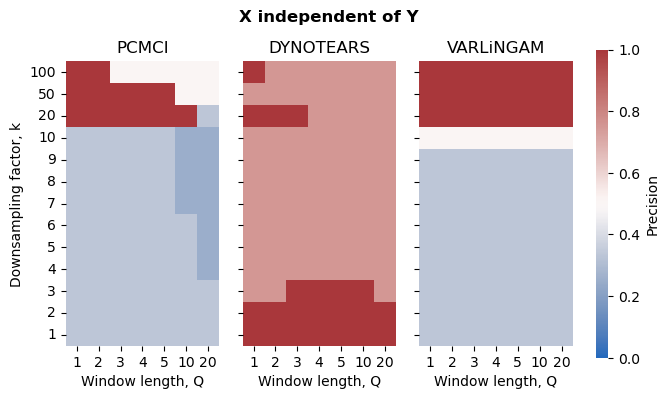

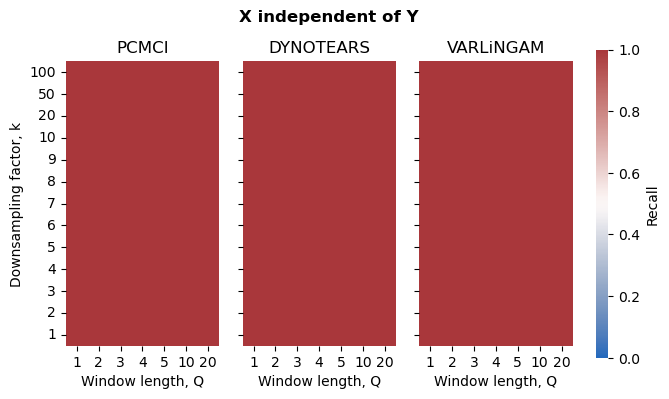

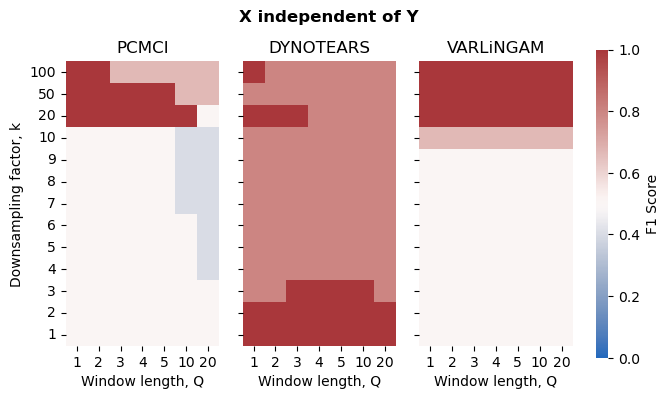

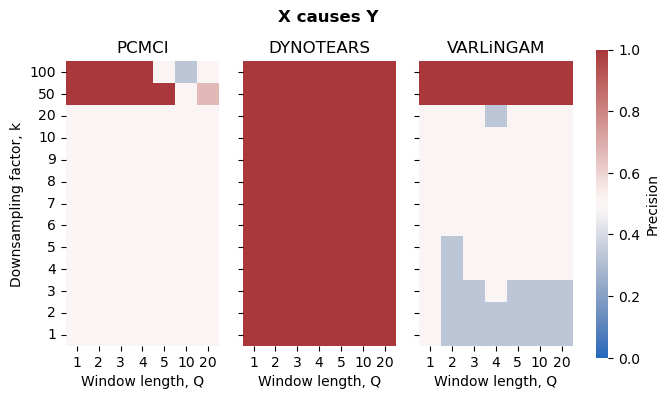

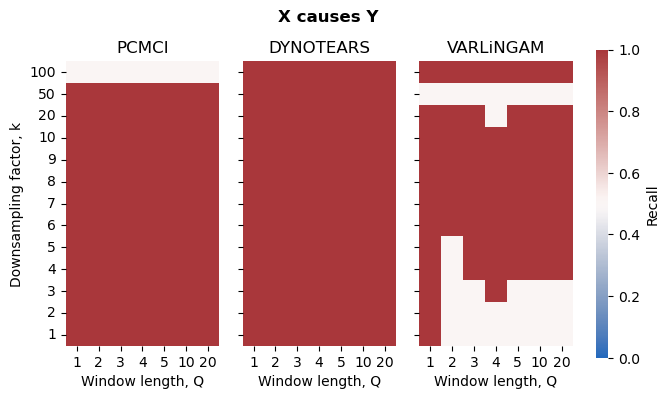

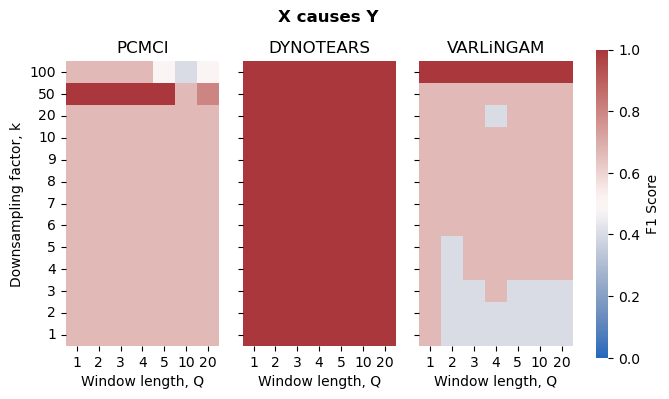

In [131]:
algs = ['PCMCI', 'DYNOTEARS', 'VARLiNGAM']
n_algs = len(algs)
scenarios = ['indep', 'x_cause_y']
metrics = ['Precision', 'Recall', 'F1']
scenarios_dict = {'indep': 'X independent of Y', 'x_cause_y': 'X causes Y'}

for s in scenarios:
    for m in metrics:
        fig, axs = plt.subplots(1, n_algs+1, gridspec_kw={'width_ratios':[1,1,1,0.08]}, figsize=(7, 4))
        for i, a in enumerate(algs):
            df_result = df[(df['id'] == a) & (df['seed'] == s)]
            df_result['lag'] = df_result['lag'].astype(int)
            cbar = (i+1) == n_algs
            ylabel = i < 1
            if cbar:
                plot_case_ax(df_result, axs[i], a, m, ylabel, cbar, axs[i+1])
            else:
                plot_case_ax(df_result, axs[i], a, m, ylabel, cbar)
        fig.suptitle(f'{scenarios_dict[s]}', fontweight='bold')
        plt.savefig(f'./plots/{s}_{m}.pdf', dpi=500)